In [2]:
from multi_time_gnn.dataset import read_dataset
dataset = read_dataset("eeg", path_eeg="../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf")

Extracting BDF parameters from ../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...


In [3]:
from multi_time_gnn.preprocessing import preprocess_eeg

In [4]:
from collections import namedtuple

# Define a box with (x_min, y_min, x_max, y_max)
Box = namedtuple('Box', ['path_eeg', 'eeg_lowpass_cutoff', 'eeg_highpass_cutoff', 'eeg_target_fs'])
config = Box(
    "../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf",
     50,
     0.5,
    100)

In [5]:
dataset_preprocessed = preprocess_eeg(dataset, config)

Extracting BDF parameters from ../../ds002778/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf...
Setting channel info structure...
Creating raw.info structure...


In [6]:
dataset

array([[-1.53839247e-02, -1.53792372e-02, -1.53773310e-02, ...,
        -1.55946118e-02, -1.55907368e-02, -1.55806743e-02],
       [-8.13506309e-03, -8.12853186e-03, -8.12396936e-03, ...,
        -7.94068845e-03, -7.93618846e-03, -7.92690723e-03],
       [-9.06321763e-03, -9.05484264e-03, -9.04915516e-03, ...,
        -9.17624867e-03, -9.16671744e-03, -9.15859245e-03],
       ...,
       [-3.18053631e-02, -3.17922694e-02, -3.17993631e-02, ...,
        -2.51320004e-02, -2.51497817e-02, -2.51597504e-02],
       [-1.97310729e-02, -1.97211979e-02, -1.97289479e-02, ...,
        -1.62497356e-02, -1.62661418e-02, -1.62788605e-02],
       [ 6.55360000e+04,  6.55360000e+04,  6.55360000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(41, 99328))

In [7]:
import matplotlib.pyplot as plt

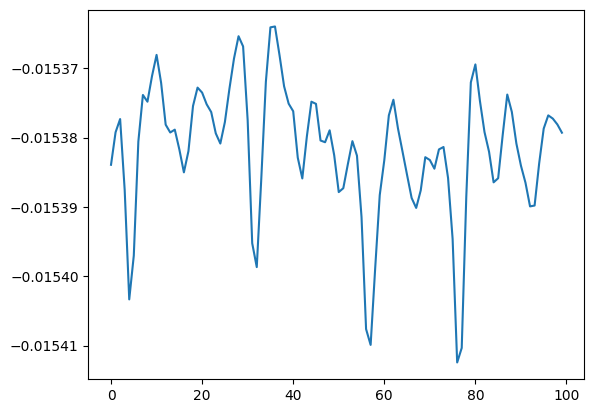

In [8]:
plt.plot(dataset[0][:100])

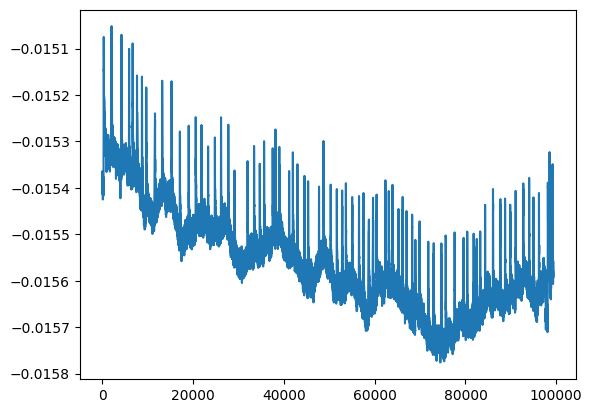

In [9]:
plt.plot(dataset[0])

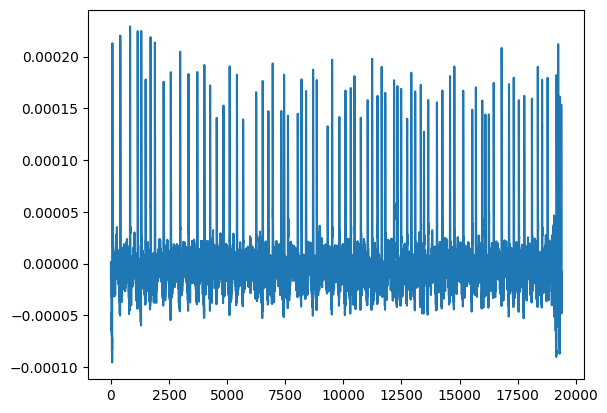

In [10]:
plt.plot(dataset_preprocessed[0])

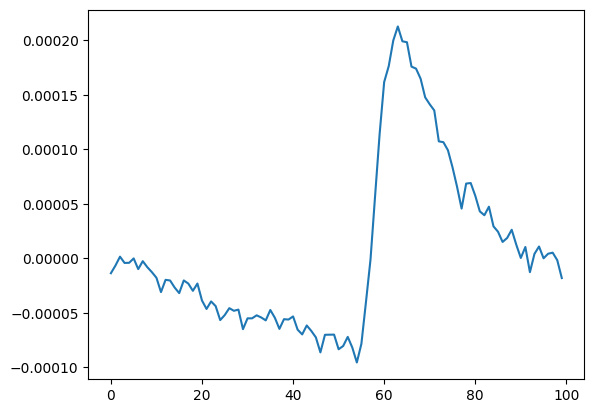

In [11]:
plt.plot(dataset_preprocessed[0][:100])

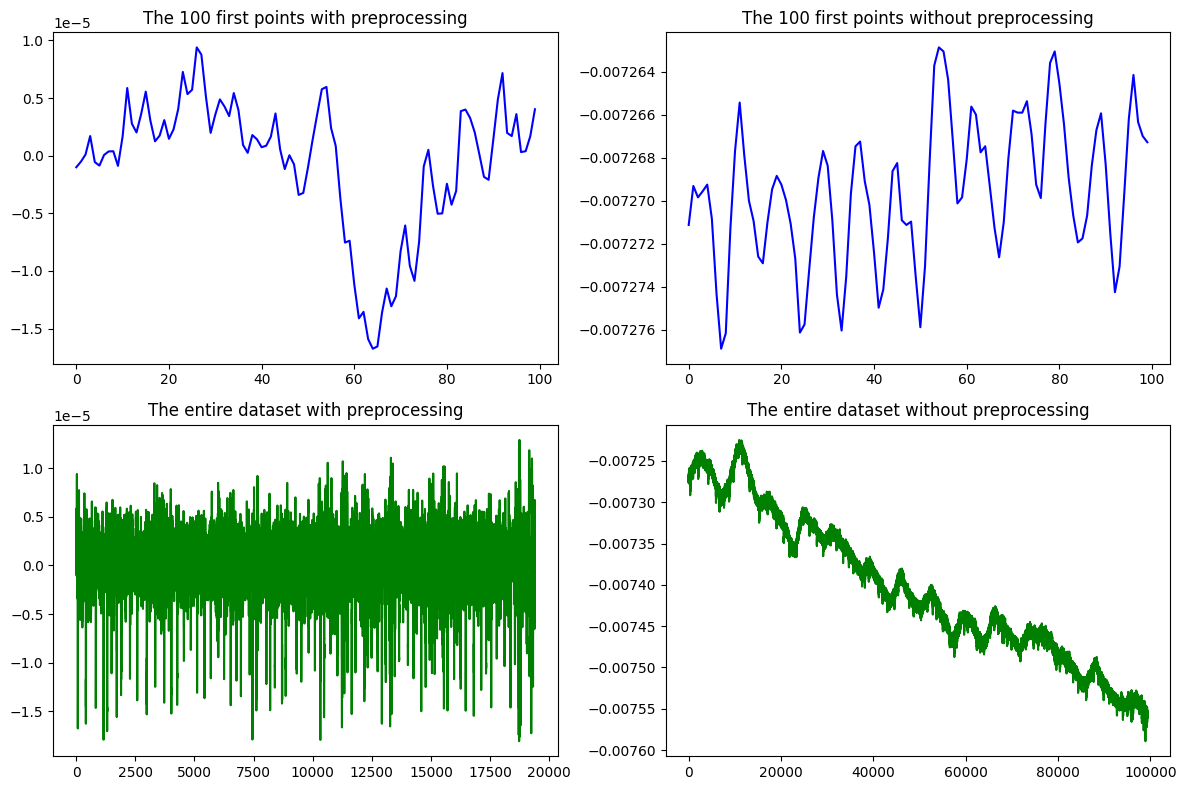

In [12]:
channel = 8
plot_length = 100

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot on each subplot
axes[0, 0].plot(dataset_preprocessed[channel][:plot_length], color='blue')
axes[0, 0].set_title(f'The {plot_length} first points with preprocessing')

axes[0, 1].plot(dataset[channel][:plot_length], color='blue')
axes[0, 1].set_title(f'The {plot_length} first points without preprocessing')

axes[1, 0].plot(dataset_preprocessed[channel], color='green')
axes[1, 0].set_title(f'The entire dataset with preprocessing')

axes[1, 1].plot(dataset[channel], color='green')
axes[1, 1].set_title(f'The entire dataset without preprocessing')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("prepocessing.png")
plt.show()